# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Distributions

![# https://commons.wikimedia.org/wiki/File:Relationship_between_mean_and_median_under_different_skewness.png](../images/measures_central_tendency.png "Title")

Let's start with `Customer Age`.

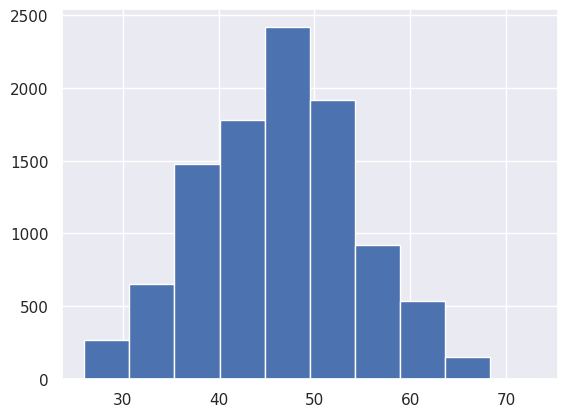

In [7]:
plt.hist(data["Customer_Age"]);

Let's take a quick look at the distribution for `Months_on_book`. 

(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <BarContainer object of 10 artists>)

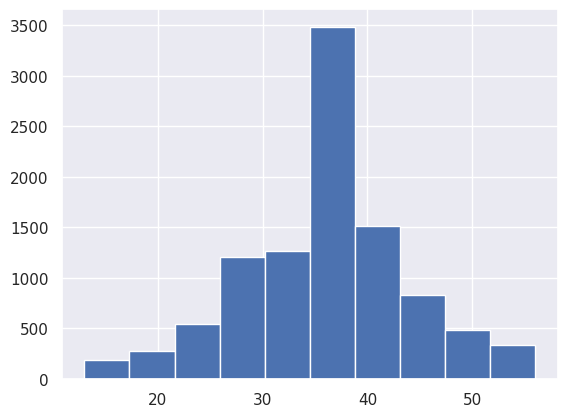

In [8]:
plt.hist(data['Months_on_book'])

Now let's take a look at the `Credit_Limit` variable that we looked at before:

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

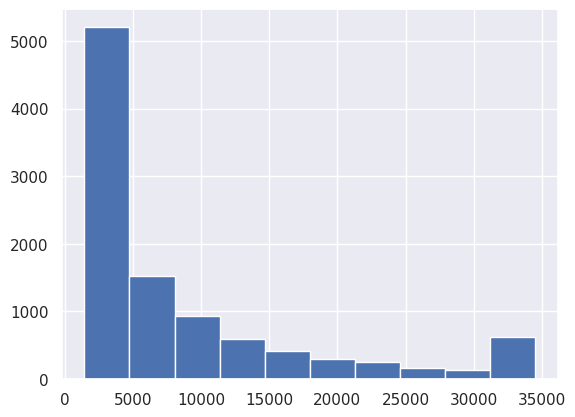

In [9]:
plt.hist(data['Credit_Limit'])

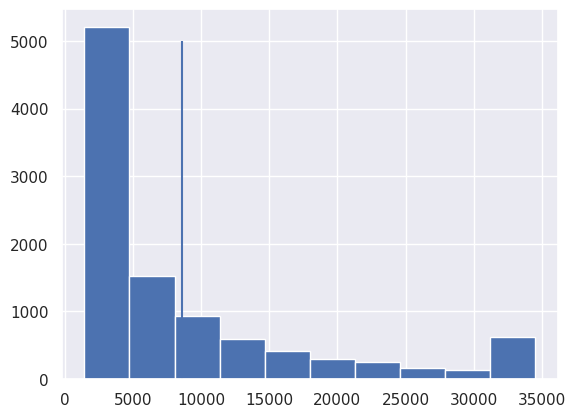

In [10]:
plt.hist(data['Credit_Limit'])
plt.vlines(data['Credit_Limit'].mean(),0,5000)
plt.vlines(data['Credit_Limit'].median(),0,5000)

In [11]:
data['Credit_Limit'].mean()

np.float64(8631.953698034955)

In [12]:
data['Credit_Limit'].median()

np.float64(4549.0)

Let's try `Total_Trans_Ct` that looked to have a somewhat similar mean and median. 